In [2]:
# here we will impor the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline

from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split,GridSearchCV  # to split the data into two parts
from sklearn.model_selection import KFold, cross_val_score  # use for K- fold cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score,average_precision_score, precision_score, confusion_matrix, classification_report

In [3]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  #
import seaborn as sns  #
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

### Dataset Inferences

The data is presented with Time, Amount, Class and a series of columns with naming that ranges from V1 to V28

Due to confidentiality issues, the actual names of V1-V28 is not provided by the source

V1-V28 are principal components obtained via PCA

This means V1 through V28 are important in determining whether a transaction is fraud or not and none of them can be neglected
'Time' and 'Amount' columns are not transformed with PCA

Feature 'Class' is the target column, have value 1 for a fraud transaction and 0 otherwise.

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score,confusion_matrix, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [7]:
dataset = pd.read_csv('creditcard.csv')
dataset.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [8]:
print('This dataset contains ',dataset.shape[0],'rows')
print('This dataset contains ',dataset.shape[1],'columns')

('This dataset contains ', 284807, 'rows')
('This dataset contains ', 31, 'columns')


In [8]:
print('Total number of zeroes (non-fraud transactions) : ', dataset['Class'].value_counts()[0])
print('Total number of ones (fraud transactions) : ', dataset['Class'].value_counts()[1])
print('Percentage of non-fraud transactions : ', 100*(dataset['Class'].value_counts()[0])/ len(dataset))
print('Percentage of fraud transactions : ', 100*(dataset['Class'].value_counts()[1])/ len(dataset))

('Total number of zeroes (non-fraud transactions) : ', 284315)
('Total number of ones (fraud transactions) : ', 492)
('Percentage of non-fraud transactions : ', 99)
('Percentage of fraud transactions : ', 0)


### Checking the Target Classes

Text(0,0.5,'Frequency')

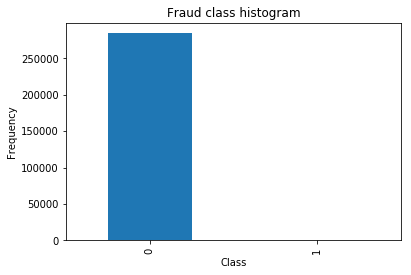

In [9]:
count_classes = pd.value_counts(dataset['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

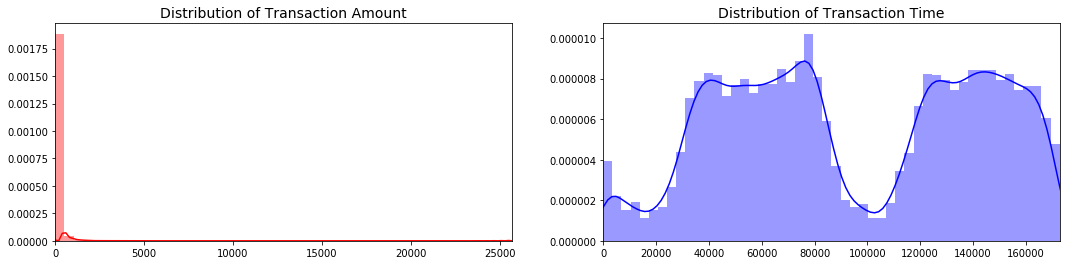

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = dataset['Amount'].values
time_val = dataset['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

Text(0,0.5,'Frequency')

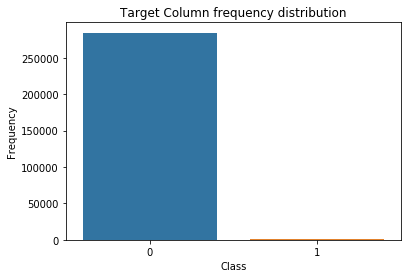

In [12]:
sns.countplot('Class', data=dataset, palette=None)
plt.title("Target Column frequency distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")

#### Class column inference

The target column is heavily imbalanced

Percentage of fraud transactions over total transactions is just 0.17%

Building a model with this target column will definitely lead to overfitting issue

Accuracy of such a model(irrespective of algorithm) will be > 99%

Feature Engineering requirements

'Class' column is heavily biased. So,it is not advised to proceed without doing something for the bias

'Time' and 'Amount' columns are not transformed. So, it is required to transform them to match with the other values(V1 - V28)

### Plot Time vs Amount to identify if there is any relationship between transaction amount over time

Text(0,0.5,'Amount')

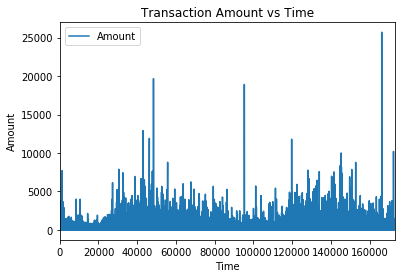

In [13]:
dataset.plot(x='Time', y='Amount', style='-')
plt.title("Transaction Amount vs Time")
plt.xlabel("Time")
plt.ylabel("Amount")

The above graph clearly illustrates there is absolutely no relationship between transaction amount over time

This means the transaction time column can be eliminated from the original data frame before further analysis

### Deleting 'Time' column from original dataframe

In [16]:
dataset = dataset.drop(['Time'],axis=1)

#### Scale the 'Amount' column before further analysis, name it as a new column and drop the 'Amount' column

In [14]:
dataset['Normalized_Amount'] = StandardScaler().fit_transform(dataset['Amount'].values.reshape(-1, 1))
dataset = dataset.drop(['Amount'],axis=1)
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalized_Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


### Change the index of Normalized_Amount and insert the same in the beginning to have a better look of data frame

In [12]:
Normalized_Amount = dataset['Normalized_Amount']
dataset=dataset.drop(['Normalized_Amount'],axis=1)
dataset.insert(0, 'Normalized_Amount', Normalized_Amount)
dataset.head(3)

,Normalized_Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0


#### Checking for Missing Values in the dataset

In [15]:
flag = dataset.isnull().sum().any()

if (flag == True):
    dataset.isnull().sum()
    print("There are null values in the dataframe")
    
else :
    print("There are no null values and dataframe is clear for further analysis")

There are no null values and dataframe is clear for further analysis


### Logistic Regression using Imbalanced data

In [18]:
X = dataset.drop(['Class'], axis = 1) 
y = dataset['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2)
clf = LogisticRegression().fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on imbalanced training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on imbalanced test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on imbalanced training set: 1.00
Accuracy of Logistic regression classifier on imbalanced test set: 1.00


### Confusion Matrix with Imbalanced Data

In [19]:
lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)

print('Logistic regression classifier (default settings)\n', confusion)

('Logistic regression classifier (default settings)\n', array([[71086,     9],
       [   33,    74]]))


The FN and FP in Credit Card Fraud Detection

False negatives (FN) in this case would be those transactions which are actually fraud transacations, but classified as non-fraud type.

False positives (FP) in this case would be those transactions which are actually non-fraud type, but classified as fraud transactions.

Considering the above two, the first case is very sensitive where it may classify a fraud transaction as a legally valid one

This needs to be sorted out

Revisiting Accuracy, Precision and Recall

Accuracy = (TP+TN)/Total Transactions

Precision = TP/(TP+FP)

Recall = TP/(TP+FN)

In [20]:
print("Logistic Regression Evaluation Parameters with imbalanced data")
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, lr_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, lr_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, lr_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, lr_predicted)))

Logistic Regression Evaluation Parameters with imbalanced data
Accuracy: 1.00
Precision: 0.89
Recall: 0.69
F1: 0.78


#### Precision-Recall Trade Off

The False Negatives is a serious threat in this case as it could classify fraud transactions as non-fraud type

From the equations in the above cell, it is pretty obvious that it is required to increase the Recall value. Means, a high recall accounts for minimal False Negatives

This inturn means that the detection problem is a recall oriented problem

The above value of Recall is much lower than Precision. It is required to find a mechanism to increase the value of Recall

Let us now try two other algorithms also on this imbalanced data

### Neural Net in imbalanced data

In [21]:
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = MLPClassifier(hidden_layer_sizes = [100, 100], alpha = 5.0,
                   random_state = 0, solver='lbfgs').fit(X_train_scaled, y_train)

print('Accuracy of NN classifier on training set: {:.2f}'.format(clf.score(X_train_scaled, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'.format(clf.score(X_test_scaled, y_test)))

Accuracy of NN classifier on training set: 1.00
Accuracy of NN classifier on test set: 1.00


### Naive Bayes in imbalanced data

In [23]:
nbclf = GaussianNB().fit(X_train, y_train)
print('Accuracy of GaussianNB classifier on training set: {:.2f}'.format(nbclf.score(X_train, y_train)))
print('Accuracy of GaussianNB classifier on test set: {:.2f}'.format(nbclf.score(X_test, y_test)))

Accuracy of GaussianNB classifier on training set: 0.98
Accuracy of GaussianNB classifier on test set: 0.98


#### Inferences obtained by dealing directly with imbalanced data

No algorithm could perform better, as the accuracies are very high

Clear case of overfitting due to imbalanced data

Some sort of data manipulation is very much required

### Dealing with class imbalance

In [24]:
# Recalling the amount of unique values in 'Class' column

print('Total number of zeroes (non-fraud transactions) : ', dataset['Class'].value_counts()[0])
print('Total number of ones (fraud transactions) : ', dataset['Class'].value_counts()[1])

('Total number of zeroes (non-fraud transactions) : ', 284315)
('Total number of ones (fraud transactions) : ', 492)


### For training and test data, two approaches are mentioned below

#### Method 1

Randomnly select equal number of non-fraud transactions from original data set

So, in this case it is required to select 492 non-fraud transactions

Create a new data frame with the new set of 492 non-fraud and 492 fraud transactions

Build a model with the new data frame of 984 transactions (492 + 492)

This method ensures a 50-50 split of both classes of targets (fraud & non-fraud)

#### Method 2 - Random Over-Sampling

Duplicate the 492 fraud transactions to make it equal to 284315 non-fraud transactions

Create a new data frame with the new set of 284315 non-fraud and ~ 284315 fraud transactions

Build a model with the new data frame of 568630 transactions (284315 + 284315)

This method also ensures a 50-50 split of both classes of targets (fraud & non-fraud)

Both methods have its own pros and cons

Both method ensures there is a target label of 50-50 split, so that the class imbalance problem is avoided

Model building will be fair as target label is equally split

In Method 1, only 492 fair transactions out of total 284315 fair transactions is considered for model building. This amounts to only 0.17%. This doesnt guarantee an accurate model.

In Method 2, all of the fair transactions are considered - and is a good thing. But the fraud transactions are duplicated 577 times (284315/492 = 577). Still I believe this is a fair approach.

### Method 1 Analysis

#### Initial step

Randomnly select 492 non-fraud transactions

Combine 492 non-fraud + 492 fraud to create a new dataframe

Split fraud & non-fraud transactions as two seperate dataframes

In [25]:
non_fraud_transactions_df = dataset[dataset['Class'] == 0]
fraud_transactions_df = dataset[dataset['Class']==1]

In [26]:
print('The dimension of fraud transactions dataframe is : ', fraud_transactions_df.shape)
print('The dimension of non-fraud transactions dataframe is : ', non_fraud_transactions_df.shape)

('The dimension of fraud transactions dataframe is : ', (492, 30))
('The dimension of non-fraud transactions dataframe is : ', (284315, 30))


### Get a randomn sample of 492 transactions from non fraud transactions dataframe

In [27]:
sample_492_non_fraud_transactions_df = non_fraud_transactions_df.sample(n=492)
print('The dimension of sample non-fraud transactions df is : ', sample_492_non_fraud_transactions_df.shape)

('The dimension of sample non-fraud transactions df is : ', (492, 30))


### Combine sample non-fraud transactions df with 492 fraud transactions df

Also shuffle and reset the index

In [28]:
method_1_df = pd.concat([sample_492_non_fraud_transactions_df, fraud_transactions_df])
method_1_df = method_1_df.sample(frac=1).reset_index(drop=True)
method_1_df.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalized_Amount
0,-3.127653,-2.601462,1.080470,0.261188,1.790920,-2.304317,-1.543045,0.649990,0.394781,-1.070962,...,0.609805,0.508017,-0.276610,0.074396,-0.042670,-0.276333,0.076475,-0.437139,0,-0.311170
1,2.120908,-0.779383,-1.114156,-0.536637,-0.975490,-1.031536,-0.976204,-0.072079,0.268723,0.111236,...,0.229129,0.685063,0.112636,-0.217971,-0.203188,-0.076661,0.022237,-0.014300,0,-0.253317
2,-15.020981,8.075240,-16.298091,5.664820,-11.918153,-4.246957,-14.716668,9.435084,-6.795398,-15.124163,...,2.525115,-0.832074,-0.186117,0.429781,0.697103,0.056031,-1.310888,-0.707403,1,-0.216815


In [29]:
print('The dimension of dataframe for Method 1 is : ',method_1_df.shape )

('The dimension of dataframe for Method 1 is : ', (984, 30))


### method_1_df is the data frame with equally distributed target column values for further analysis

Text(0,0.5,'Frequency')

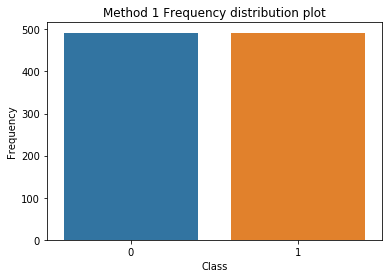

In [30]:
# Let's now verify this with a frequency distribution plot of method_1_df

sns.countplot('Class', data=method_1_df, palette=None)
plt.title("Method 1 Frequency distribution plot")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [31]:
print('Percentage of non-fraud transactions in method_1_df : ',  100*(method_1_df['Class'].value_counts()[0])/ len(method_1_df))
print('Percentage of fraud transactions in method_1_df : ',  100*(method_1_df['Class'].value_counts()[1])/ len(method_1_df))

('Percentage of non-fraud transactions in method_1_df : ', 50)
('Percentage of fraud transactions in method_1_df : ', 50)


### Split the method_1_df into inputs and target labels for further analysis (X & y split)

In [32]:
X = method_1_df.drop(['Class'], axis = 1) 
y = method_1_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [33]:
print("Number transactions in training dataset for Method 1: ", len(X_train))
print("Number transactions in testing dataset  for Method 1: ", len(X_test))
print("Total number of transactions  for Method 1 : ", len(X_train)+len(X_test))

('Number transactions in training dataset for Method 1: ', 738)
('Number transactions in testing dataset  for Method 1: ', 246)
('Total number of transactions  for Method 1 : ', 984)


#### Applying Logistic Regression in Method 1 - (492 + 492)

In [34]:
clf = LogisticRegression().fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.95
Accuracy of Logistic regression classifier on test set: 0.94


## Confusion Matrix

In [35]:
lr_predicted = clf.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)
print('Logistic regression classifier (default settings)\n', confusion)

('Logistic regression classifier (default settings)\n', array([[121,   5],
       [  9, 111]]))


## Precision & Recall Scores

In [36]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, lr_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, lr_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, lr_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, lr_predicted)))

Accuracy: 0.94
Precision: 0.96
Recall: 0.93
F1: 0.94


## Precision-Recall Tradeoff in under-sampled data

Clearly the Recall value have increased way better than that of unbalanced data

#### Using GridSearch to find best parameters for Logistic Regression

In [37]:
logistic_parameters = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid = GridSearchCV(LogisticRegression(), logistic_parameters)
grid.fit(X_train, y_train)
best_log_reg = grid.best_estimator_

In [38]:
logistic_score = cross_val_score(best_log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', logistic_score.mean())

('Logistic Regression Cross Validation Score: ', 0.9376529933576914)


### Confusion Matrix after tuning in with best parameters

In [39]:
lr_predicted = grid.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)
print('Logistic regression classifier with Cross-validation (default settings)\n', confusion)

('Logistic regression classifier with Cross-validation (default settings)\n', array([[122,   4],
       [ 11, 109]]))


In [40]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, lr_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, lr_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, lr_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, lr_predicted)))

Accuracy: 0.94
Precision: 0.96
Recall: 0.91
F1: 0.94


### Naive Bayes in Method 1

In [41]:
nbclf = GaussianNB().fit(X_train, y_train)
print('Accuracy of GaussianNB classifier on training set: {:.2f}'.format(nbclf.score(X_train, y_train)))
print('Accuracy of GaussianNB classifier on test set: {:.2f}'.format(nbclf.score(X_test, y_test)))

Accuracy of GaussianNB classifier on training set: 0.92
Accuracy of GaussianNB classifier on test set: 0.93


#### Neural Net in Method 1

In [42]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf = MLPClassifier(hidden_layer_sizes = [100, 100], alpha = 5.0,
                   random_state = 0, solver='lbfgs').fit(X_train_scaled, y_train)

print('Accuracy of NN classifier on training set: {:.2f}'.format(clf.score(X_train_scaled, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'.format(clf.score(X_test_scaled, y_test)))

Accuracy of NN classifier on training set: 0.94
Accuracy of NN classifier on test set: 0.93


## Method 2 Analysis

Here the 492 fraud transactions will be duplicated to reach and become equal to 284315 non-fraud transactions

The analysis done in Method 1 will be repeated for this set of data

Revisiting some codes

In [43]:
print('The dimension of fraud transactions dataframe is : ', fraud_transactions_df.shape)
print('The dimension of non-fraud transactions dataframe is : ', non_fraud_transactions_df.shape)

('The dimension of fraud transactions dataframe is : ', (492, 30))
('The dimension of non-fraud transactions dataframe is : ', (284315, 30))


non_fraud_transactions_df can be kept intact as no change is required in Method 2 as well

492 entries in fraud_transactions_df will be replicated to reach 284315

First step is to understand how many times bigger is non_fraud_transactions_df compared to fraud_transactions_df. This can be obtained by simply dividing total number of rows of non fraud transactions with that of fraud transactions.

In [44]:
len(non_fraud_transactions_df) / len(fraud_transactions_df)

577

This means, the 492 transactions of fraud_transactions_df needs to be duplicated 577 times to make the number of rows equal to that of non_fraud_transactions_df

In [45]:
upsampled_df = pd.concat([fraud_transactions_df] * 577, ignore_index=True)

In [46]:
print('The dimension of upsampled fraud transactions dataframe is : ', upsampled_df.shape)
print('The dimension of non-fraud transactions dataframe is : ', non_fraud_transactions_df.shape)

('The dimension of upsampled fraud transactions dataframe is : ', (283884, 30))
('The dimension of non-fraud transactions dataframe is : ', (284315, 30))


In [47]:
print('Difference in number of rows between two dataframes after upsampling is : ', len(non_fraud_transactions_df) - len(upsampled_df))

('Difference in number of rows between two dataframes after upsampling is : ', 431)


The difference is quite negligible compared to total number of transacctions and so the new data frame can be used for analysis

In [48]:
upsampled_df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalized_Amount
count,283884.000000,283884.000000,283884.000000,283884.000000,283884.000000,283884.000000,283884.000000,283884.000000,283884.000000,283884.000000,...,283884.000000,283884.000000,283884.000000,283884.000000,283884.000000,283884.000000,283884.000000,283884.000000,283884.0,283884.000000
mean,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,...,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,1.0,0.135382
std,6.776801,4.286860,7.103720,2.870401,5.367015,1.856238,7.199458,6.790931,2.498357,4.892370,...,3.865377,1.493085,1.578039,0.515053,0.796396,0.471200,1.375368,0.546736,0.0,1.025200
min,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,-24.588262,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,1.0,-0.353229
25%,-6.036063,1.188226,-8.643489,2.373050,-4.792835,-2.501511,-7.965295,-0.195336,-3.872383,-7.756698,...,0.041787,-0.533764,-0.342175,-0.436809,-0.314348,-0.259416,-0.020025,-0.108868,1.0,-0.349231
50%,-2.342497,2.717869,-5.075257,4.177147,-1.522962,-1.424616,-3.034402,0.621508,-2.208768,-4.578825,...,0.592146,0.048434,-0.073135,-0.060795,0.088371,0.004321,0.394926,0.146344,1.0,-0.316247
75%,-0.419200,4.971257,-2.276185,6.348729,0.214562,-0.413216,-0.945954,1.764879,-0.787850,-2.614184,...,1.244611,0.617474,0.308378,0.285328,0.456515,0.396733,0.826029,0.381152,1.0,0.070128
max,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,4.031435,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,1.0,8.146182


### Combine the two dataframes and shuffle the rows

In [49]:
method_2_df = pd.concat([upsampled_df, non_fraud_transactions_df])
method_2_df = method_2_df.sample(frac=1).reset_index(drop=True)
method_2_df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Normalized_Amount
count,568199.000000,568199.000000,568199.000000,568199.000000,568199.000000,568199.000000,568199.000000,568199.000000,568199.000000,568199.000000,...,568199.000000,568199.000000,568199.000000,568199.000000,568199.000000,568199.000000,568199.000000,568199.000000,568199.000000,568199.000000
mean,-2.380032,1.807377,-3.507883,2.265359,-1.571689,-0.697128,-2.777432,0.284607,-1.287348,-2.831373,...,0.355906,0.007007,-0.020104,-0.052434,0.020673,0.025760,0.085075,0.037739,0.499621,0.067522
std,5.524596,3.716909,6.219937,3.204942,4.219477,1.759719,5.862702,4.878250,2.320271,4.537489,...,2.801729,1.172987,1.199111,0.564742,0.673027,0.477458,1.016070,0.452915,0.500000,1.014907
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,-0.353229
25%,-2.866364,-0.145954,-5.112924,-0.108624,-1.796308,-1.574565,-3.103570,-0.204185,-2.312468,-4.592390,...,-0.170273,-0.538375,-0.239303,-0.401236,-0.317145,-0.288658,-0.063355,-0.058971,0.000000,-0.347712
50%,-0.774602,0.961653,-1.359742,1.309580,-0.427444,-0.647378,-0.642716,0.154612,-0.710110,-0.865587,...,0.148284,0.029638,-0.032977,0.005726,0.050524,-0.015451,0.048995,0.034988,0.000000,-0.277426
75%,1.043025,2.795853,0.343966,4.243069,0.477791,0.080091,0.270212,0.866910,0.172421,0.022679,...,0.650988,0.576637,0.192776,0.373533,0.393032,0.324207,0.454851,0.219021,1.000000,0.046539
max,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,1.000000,102.362243


In [50]:
print('The dimension of method_2_df is :', method_2_df.shape)

('The dimension of method_2_df is :', (568199, 30))


### Frequency distribution of Class column values in method_2_df

Text(0,0.5,'Frequency')

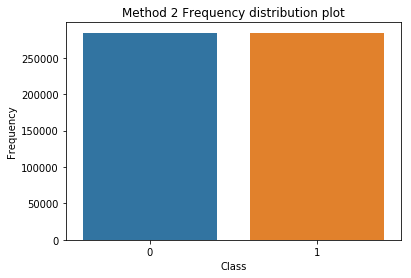

In [51]:
sns.countplot('Class', data=method_2_df, palette=None)
plt.title("Method 2 Frequency distribution plot")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [52]:
print('Percentage of non-fraud transactions in method_2_df : ',  100*(method_2_df['Class'].value_counts()[0])/ len(method_2_df))
print('Percentage of fraud transactions in method_2_df : ',  100*(method_2_df['Class'].value_counts()[1])/ len(method_2_df))

('Percentage of non-fraud transactions in method_2_df : ', 50)
('Percentage of fraud transactions in method_2_df : ', 49)


#### Split the method_1_df into inputs and target labels for further analysis (X & y split)

In [53]:
X = method_2_df.drop(['Class'], axis = 1) 
y = method_2_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)


In [54]:
print("Number transactions in training dataset for Method 2: ", len(X_train))
print("Number transactions in testing dataset  for Method 2: ", len(X_test))
print("Total number of transactions  for Method 2 : ", len(X_train)+len(X_test))

('Number transactions in training dataset for Method 2: ', 426149)
('Number transactions in testing dataset  for Method 2: ', 142050)
('Total number of transactions  for Method 2 : ', 568199)


## Logistic Regression in Method 2

In [55]:
clf = LogisticRegression().fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.95
Accuracy of Logistic regression classifier on test set: 0.95


### Confusion Matrix

In [56]:
lr_predicted = clf.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)
print('Logistic regression classifier (default settings)\n', confusion)

('Logistic regression classifier (default settings)\n', array([[69159,  1674],
       [ 5735, 65482]]))


### Precision & Recall Scores

In [57]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, lr_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, lr_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, lr_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, lr_predicted)))

Accuracy: 0.95
Precision: 0.98
Recall: 0.92
F1: 0.95


### Using GridSearch to find best parameters for Logistic Regression

In [58]:
logistic_parameters = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid = GridSearchCV(LogisticRegression(), logistic_parameters)
grid.fit(X_train, y_train)
best_log_reg = grid.best_estimator_
logistic_score = cross_val_score(best_log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', logistic_score.mean())

('Logistic Regression Cross Validation Score: ', 0.9486001324047846)


In [59]:
lr_predicted = grid.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)
print('Logistic regression classifier with Cross-validation (default settings)\n', confusion)

('Logistic regression classifier with Cross-validation (default settings)\n', array([[69168,  1665],
       [ 5860, 65357]]))


In [60]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, lr_predicted)))
print('Precision: {:.2f}'.format(precision_score(y_test, lr_predicted)))
print('Recall: {:.2f}'.format(recall_score(y_test, lr_predicted)))
print('F1: {:.2f}'.format(f1_score(y_test, lr_predicted)))

Accuracy: 0.95
Precision: 0.98
Recall: 0.92
F1: 0.95


# Naive Bayes in Method 2

In [61]:
nbclf = GaussianNB().fit(X_train, y_train)
print('Accuracy of GaussianNB classifier on training set: {:.2f}'.format(nbclf.score(X_train, y_train)))
print('Accuracy of GaussianNB classifier on test set: {:.2f}'.format(nbclf.score(X_test, y_test)))

Accuracy of GaussianNB classifier on training set: 0.92
Accuracy of GaussianNB classifier on test set: 0.92


### Neural Net in Method 2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = MLPClassifier(hidden_layer_sizes = [100, 100], alpha = 5.0,
                   random_state = 0, solver='lbfgs').fit(X_train_scaled, y_train)

print('Accuracy of NN classifier on training set: {:.2f}'.format(clf.score(X_train_scaled, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'.format(clf.score(X_test_scaled, y_test)))

### Summary

This is a very basic Kernel which gives idea about how to deal with imbalanced data sets.

Of all the three classification algorithms used, Logistic Regression is found to be better when dealing with imbalanced data.

The Kernel can be improved by bringing in more classification algorithms, more hyper tuning parameters to existing algorithms etc.**